Let's start examples with futures analysis.

## Imports.

In [1]:
from avengers import Jarvis, Vision
from sklearn.linear_model import LinearRegression

## Load market data.

First, we create a Jarvis object with RTS-12.22 futures history.

Parameter 'fut' is True, 'opt' is False to save some resources.
By defaul J. class uses Pandas read_csv to import file from 'FUTURES/...' folder.
If nesessary, data will be downloaded from MOEX base and stored at 'FUTURES/...' folder.

In [2]:
riz2 = Jarvis('RTS-12.22', fut = True, opt = False)

J. class .info() method is used to show most common info incl. parse log.

In [3]:
riz2.info()

Name: RTS-12.22

Fut info:
Parse_log:


,name,columns,to_datetime,sort_values,set_index,read_scv,parse_local,set_t_col
0,RTS-12.22,True,True,True,True,True,True,True



Head:


,adjp
date,
2020-12-11,130870
2020-12-14,129990
2020-12-15,129010
2020-12-16,131010
2020-12-17,133050



Tail:


,adjp
date,
2022-12-09,109890
2022-12-12,109130
2022-12-13,109050
2022-12-14,106740
2022-12-15,103915



Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510 entries, 2020-12-11 to 2022-12-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   adjp    510 non-null    int64
dtypes: int64(1)
memory usage: 8.0 KB
None

Missings:
adjp    0
dtype: int64

Monotonic:
True

Describe:


,adjp
count,510.000000
mean,132374.754902
std,24596.471695
min,78260.000000
25%,111010.000000
50%,135655.000000
75%,153382.500000
max,182690.000000



Opt info:
Parse_log:
Opt parse log:
Head:
Tail:
Info:
Missings:
Monotonic:
Describe:
-----


As we can see, there are no mistakes during download, no missing values and outliers, date is set as an index and is monotonic, adjusted price is set as a target column.

J. class contains currently no info about RTS-12.22 options.

J. class provides no self plot methods. We have to use Pandas, Matplitlib or another python libraries and it's methods for illustrations. Pandas, Matplotlib.pyplot and Seaborn libraries are already preloaded at avengers.py, so we can use it.

Sometimes it can be easyer to use J. class to perform computations, but to assign a new object to Jarvis.futures_df for visualisations. J.futures_df is a usual Pandas DataFrame.

<AxesSubplot:xlabel='date'>

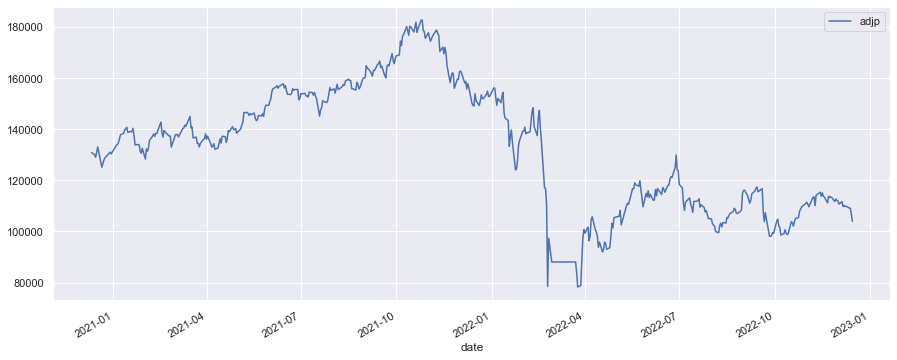

In [4]:
riz2.futures_df.plot(figsize = (15, 6))

Let's start with realised volatility analysis with .calc_rv() method.

In [5]:
riz2.calc_rv()

In [6]:
riz2.futures_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510 entries, 2020-12-11 to 2022-12-15
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjp           510 non-null    int64  
 1   return         509 non-null    float64
 2   ln_r           509 non-null    float64
 3   volatility_5   505 non-null    float64
 4   volatility_20  490 non-null    float64
 5   volatility_60  450 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 27.9 KB


<AxesSubplot:xlabel='date'>

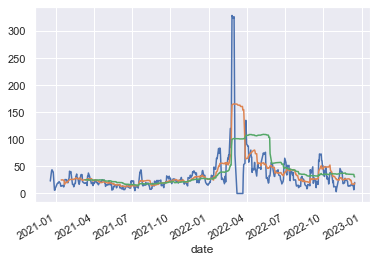

In [7]:
riz2.futures_df.volatility_5.plot()
riz2.futures_df.volatility_20.plot()
riz2.futures_df.volatility_60.plot()

Now, let's add some moving averages. J.movings() method has parameters 'n' and 'shift'. 'N' is set to 5, and 'shift' to 0 by default. If you are going to use moving averages to build predictive models don't forget to set 'shift' to 1.

In [8]:
riz2.movings()

Let's add also 10-days moving average.

In [9]:
riz2.movings(10)

Loop for movings

In [10]:
for n in range(20, 70, 10):
    riz2.movings(n)

In [11]:
riz2.futures_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510 entries, 2020-12-11 to 2022-12-15
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjp           510 non-null    int64  
 1   return         509 non-null    float64
 2   ln_r           509 non-null    float64
 3   volatility_5   505 non-null    float64
 4   volatility_20  490 non-null    float64
 5   volatility_60  450 non-null    float64
 6   mov_5          506 non-null    float64
 7   mov_10         501 non-null    float64
 8   mov_20         491 non-null    float64
 9   mov_30         481 non-null    float64
 10  mov_40         471 non-null    float64
 11  mov_50         461 non-null    float64
 12  mov_60         451 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 55.8 KB


<AxesSubplot:xlabel='date'>

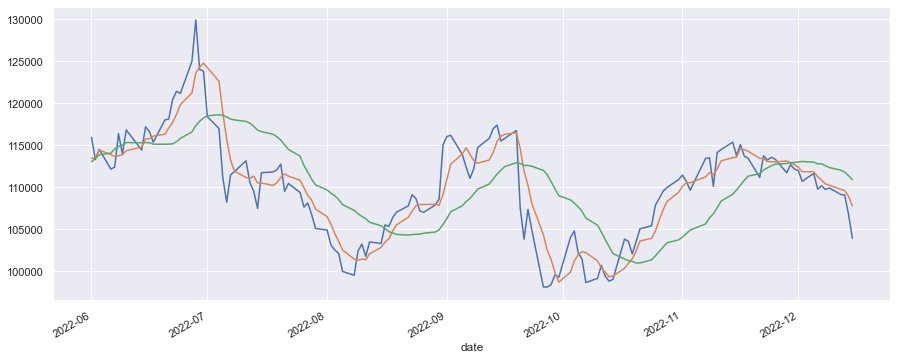

In [12]:
riz2.futures_df.adjp['2022-06':].plot(figsize = (15, 6))
riz2.futures_df.mov_5['2022-06':].plot(figsize = (15, 6))
riz2.futures_df.mov_20['2022-06':].plot(figsize = (15, 6))

Nice! And easy)

We can use a simple linear regression to identify trend. To build a trendline with time step we have to apply a J.calendar_features() method.

In [13]:
riz2.calendar_features()

As we can see below, J.calendar_features() method provides such features as year, month, day, day of week and trigonometric functions calculated from these features. It can be used for building ML models.

In [14]:
riz2.futures_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510 entries, 2020-12-11 to 2022-12-15
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjp           510 non-null    int64  
 1   return         509 non-null    float64
 2   ln_r           509 non-null    float64
 3   volatility_5   505 non-null    float64
 4   volatility_20  490 non-null    float64
 5   volatility_60  450 non-null    float64
 6   mov_5          506 non-null    float64
 7   mov_10         501 non-null    float64
 8   mov_20         491 non-null    float64
 9   mov_30         481 non-null    float64
 10  mov_40         471 non-null    float64
 11  mov_50         461 non-null    float64
 12  mov_60         451 non-null    float64
 13  const          510 non-null    float64
 14  time_step      510 non-null    int64  
 15  year           510 non-null    int64  
 16  month          510 non-null    int64  
 17  day            510 non-null    int6

Now we need Pandas and Matplotlib.pyplot, because we start working with objects outside Jarvis class.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
model = LinearRegression()

In [17]:
X = riz2.futures_df[['time_step']].dropna()
y = riz2.futures_df[riz2.TARGET_COLUMN].dropna()
y, X = y.align(X, join='inner', axis = 0)

In [18]:
model.fit(X, y)

LinearRegression()

In [19]:
preds = pd.Series(model.predict(X), index = X.index)

In [20]:
resids = y - preds

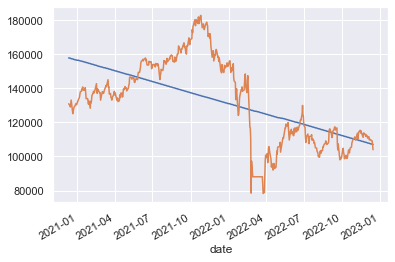

In [21]:
preds.plot()
y.plot()
plt.show()

<AxesSubplot:xlabel='date'>

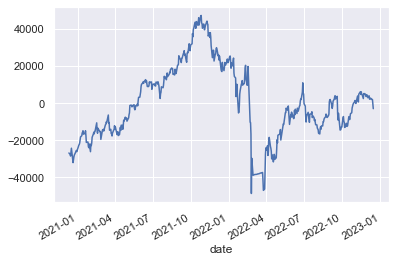

In [22]:
resids.plot()

We can also use .lags() features for autoregressive models, .diffs() and so on.

In [23]:
riz2.lags()

In [24]:
riz2.diffs()

In [25]:
riz2.futures_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 510 entries, 2020-12-11 to 2022-12-15
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adjp           510 non-null    int64  
 1   return         509 non-null    float64
 2   ln_r           509 non-null    float64
 3   volatility_5   505 non-null    float64
 4   volatility_20  490 non-null    float64
 5   volatility_60  450 non-null    float64
 6   mov_5          506 non-null    float64
 7   mov_10         501 non-null    float64
 8   mov_20         491 non-null    float64
 9   mov_30         481 non-null    float64
 10  mov_40         471 non-null    float64
 11  mov_50         461 non-null    float64
 12  mov_60         451 non-null    float64
 13  const          510 non-null    float64
 14  time_step      510 non-null    int64  
 15  year           510 non-null    int64  
 16  month          510 non-null    int64  
 17  day            510 non-null    int6

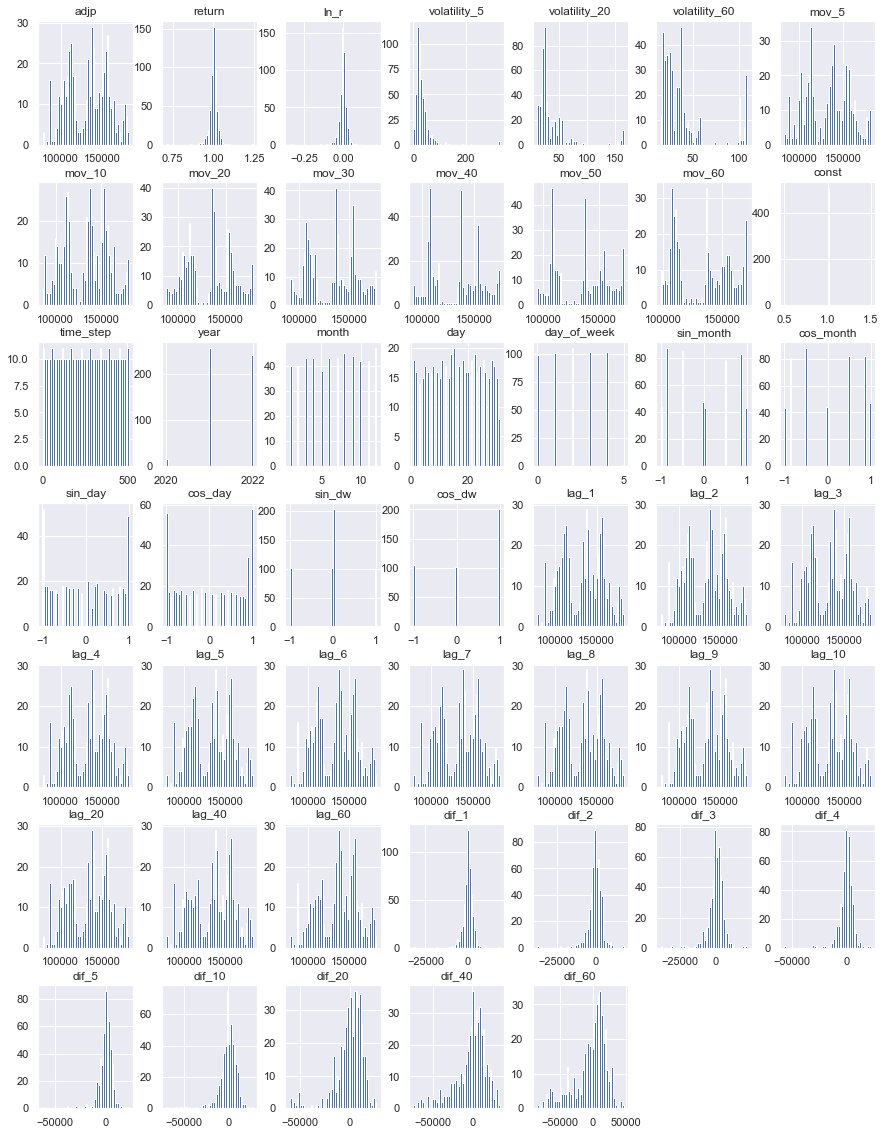

In [26]:
riz2.futures_df.hist(bins = 50, figsize = (15, 20))
plt.show()

In [27]:
riz2.futures_df.describe()

,adjp,return,ln_r,volatility_5,volatility_20,volatility_60,mov_5,mov_10,mov_20,mov_30,...,lag_60,dif_1,dif_2,dif_3,dif_4,dif_5,dif_10,dif_20,dif_40,dif_60
count,510.000000,509.000000,509.000000,505.000000,490.000000,450.000000,506.000000,501.000000,491.000000,481.000000,...,450.000000,509.000000,508.000000,507.000000,506.000000,505.000000,500.000000,490.000000,470.000000,450.000000
mean,132374.754902,0.999946,-0.000453,32.008914,36.447051,39.708035,132486.179842,132615.056886,132859.483198,133048.741164,...,135676.400000,-52.956778,-98.828740,-138.392505,-181.907115,-228.128713,-405.450000,-847.397959,-1928.585106,-3664.611111
std,24596.471695,0.027749,0.028615,34.296090,29.578371,27.535198,24484.232462,24371.602007,24142.652242,23957.861138,...,24271.196287,3177.198252,4304.932593,5227.936702,6159.416985,6970.672017,10433.929937,14064.782820,20101.875931,24582.610688
min,78260.000000,0.709917,-0.342608,0.000005,11.902826,14.587826,83416.000000,85738.000000,86946.000000,90628.333333,...,78260.000000,-32060.000000,-38330.000000,-38660.000000,-56780.000000,-62150.000000,-69930.000000,-60330.000000,-74340.000000,-83940.000000
25%,111010.000000,0.990323,-0.009724,16.551901,21.903069,21.674958,111250.500000,111327.000000,111129.250000,109899.666667,...,115375.000000,-1320.000000,-1850.000000,-2220.000000,-2482.500000,-2770.000000,-3990.000000,-6305.000000,-9187.500000,-13522.500000
50%,135655.000000,1.000716,0.000716,24.141553,26.284050,32.070678,135961.000000,135697.000000,136066.500000,136564.000000,...,138340.000000,80.000000,105.000000,230.000000,465.000000,350.000000,315.000000,1700.000000,1887.500000,3575.000000
75%,153382.500000,1.010982,0.010922,37.816532,42.359945,40.877899,153370.000000,153263.000000,153254.250000,153535.000000,...,154675.000000,1430.000000,2222.500000,2675.000000,2820.000000,3700.000000,5565.000000,8447.500000,10787.500000,12660.000000
max,182690.000000,1.240122,0.215210,328.244016,164.994230,109.038099,180864.000000,180107.000000,178623.500000,177251.000000,...,182690.000000,18840.000000,18580.000000,21830.000000,22440.000000,22830.000000,27480.000000,26290.000000,34940.000000,46090.000000


For the conclusion let's take a look at the Vision class for the concatenated RTS futures history.

In [28]:
RTS = Vision('RTS', fut = True, opt = False)

In [29]:
RTS.objects_dict

{'RTS-3.17': <avengers.Jarvis at 0x7fa1a06d3970>,
 'RTS-6.17': <avengers.Jarvis at 0x7fa1a06d3f10>,
 'RTS-9.17': <avengers.Jarvis at 0x7fa1801cefa0>,
 'RTS-12.17': <avengers.Jarvis at 0x7fa1a038f430>,
 'RTS-3.18': <avengers.Jarvis at 0x7fa1a0932700>,
 'RTS-6.18': <avengers.Jarvis at 0x7fa19455c8e0>,
 'RTS-9.18': <avengers.Jarvis at 0x7fa18020beb0>,
 'RTS-12.18': <avengers.Jarvis at 0x7fa19465dfd0>,
 'RTS-3.19': <avengers.Jarvis at 0x7fa19465dc70>,
 'RTS-6.19': <avengers.Jarvis at 0x7fa19465d490>,
 'RTS-9.19': <avengers.Jarvis at 0x7fa19465d1c0>,
 'RTS-12.19': <avengers.Jarvis at 0x7fa194653a60>,
 'RTS-3.20': <avengers.Jarvis at 0x7fa194653520>,
 'RTS-6.20': <avengers.Jarvis at 0x7fa194653b80>,
 'RTS-9.20': <avengers.Jarvis at 0x7fa1946535e0>,
 'RTS-12.20': <avengers.Jarvis at 0x7fa194651d00>,
 'RTS-3.21': <avengers.Jarvis at 0x7fa194651310>,
 'RTS-6.21': <avengers.Jarvis at 0x7fa194651d60>,
 'RTS-9.21': <avengers.Jarvis at 0x7fa194663a90>,
 'RTS-12.21': <avengers.Jarvis at 0x7fa194663b

In [30]:
RTS.objects_dict['RTS-12.21'].info()

Name: RTS-12.21

Fut info:
Parse_log:


,name,columns,to_datetime,sort_values,set_index,read_scv,parse_local,set_t_col
0,RTS-12.21,True,True,True,True,True,True,True



Head:


,adjp
date,
2019-12-13,139590
2019-12-16,140450
2019-12-17,140890
2019-12-18,140670
2019-12-19,141420



Tail:


,adjp
date,
2021-12-10,161270
2021-12-13,155160
2021-12-14,154900
2021-12-15,154230
2021-12-16,160347



Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 507 entries, 2019-12-13 to 2021-12-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   adjp    507 non-null    int64
dtypes: int64(1)
memory usage: 7.9 KB
None

Missings:
adjp    0
dtype: int64

Monotonic:
True

Describe:


,adjp
count,507.000000
mean,138662.755424
std,23902.941780
min,78940.000000
25%,118740.000000
50%,140850.000000
75%,158720.000000
max,191060.000000



Opt info:
Parse_log:
Opt parse log:
Head:
Tail:
Info:
Missings:
Monotonic:
Describe:
-----


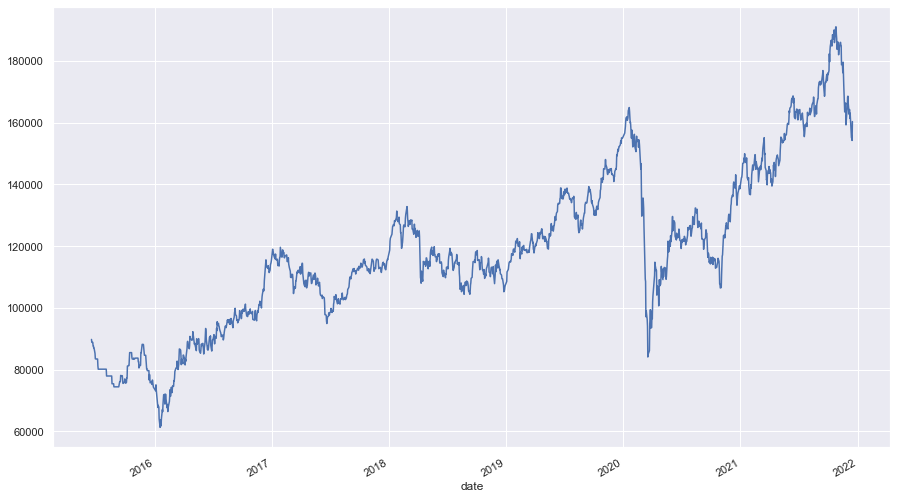

In [31]:
RTS.plot()

Cobine J. and V. methods to analyse long time history.